<a href="https://colab.research.google.com/github/mili-b/PredictiveAnalytics/blob/main/HousePriceBoston3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import winsorize

from sklearn.preprocessing import scale

from sklearn.model_selection import train_test_split

#linear regression
import statsmodels.api as sm
from scipy import stats


from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn import metrics

#Random Forest
from sklearn.ensemble import RandomForestRegressor

#Ridge Regression
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

#SVM
from sklearn import svm




/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import and examine data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mili-b/Data/main/housing_prices.csv')


In [ ]:
df.shape

(506, 12)

In [ ]:
df.head()

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,24000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,21600
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,34700
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,33400
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,36200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   crime_rate             506 non-null    float64
 1   big_lots_percent       506 non-null    float64
 2   office_percent         506 non-null    float64
 3   charles_river          506 non-null    int64  
 4   nitrous                506 non-null    float64
 5   avg_num_rooms          506 non-null    float64
 6   pre_1940               506 non-null    float64
 7   distance_to_city       506 non-null    float64
 8   highway_access         506 non-null    int64  
 9   tax_rate               506 non-null    int64  
 10  student_teacher_ratio  506 non-null    float64
 11  median_price           506 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 47.6 KB


In [ ]:
df.describe()

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,22532.806324
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,9197.104087
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,5000.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,17025.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,21200.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,25000.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,50000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d2086c850>,
      dtype=object)

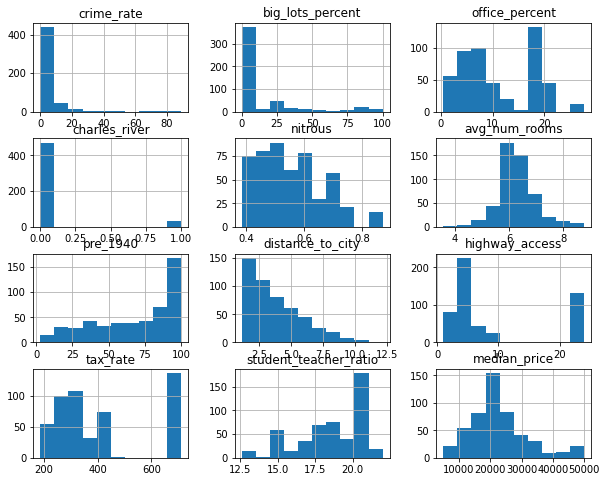

In [ ]:
# histograms - have some skewness
df.hist(figsize=(10,8))

In [ ]:
# some correlationn among X variables
df.corr()

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price
crime_rate,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.388305
big_lots_percent,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.360445
office_percent,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.483725
charles_river,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.175260
nitrous,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.427321
avg_num_rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.695360
pre_1940,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.376955
distance_to_city,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.249929
highway_access,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.381626
tax_rate,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.468536


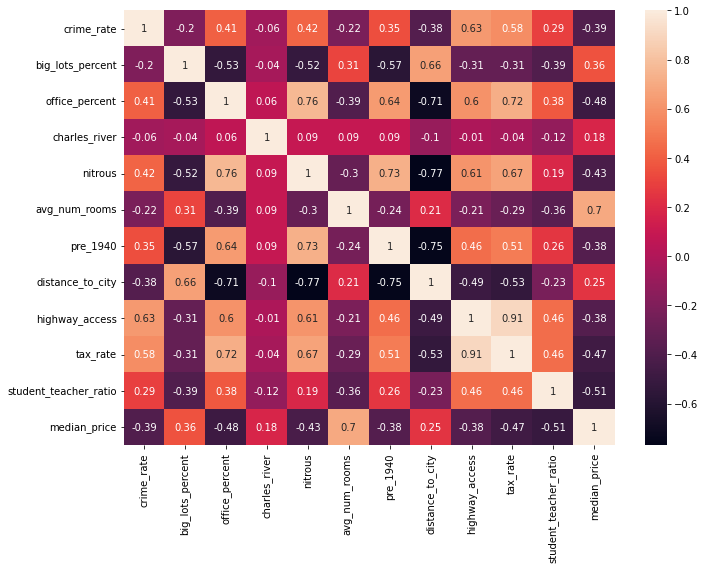

In [ ]:
plt.figure(figsize=(11,8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

<Figure size 792x1008 with 0 Axes>

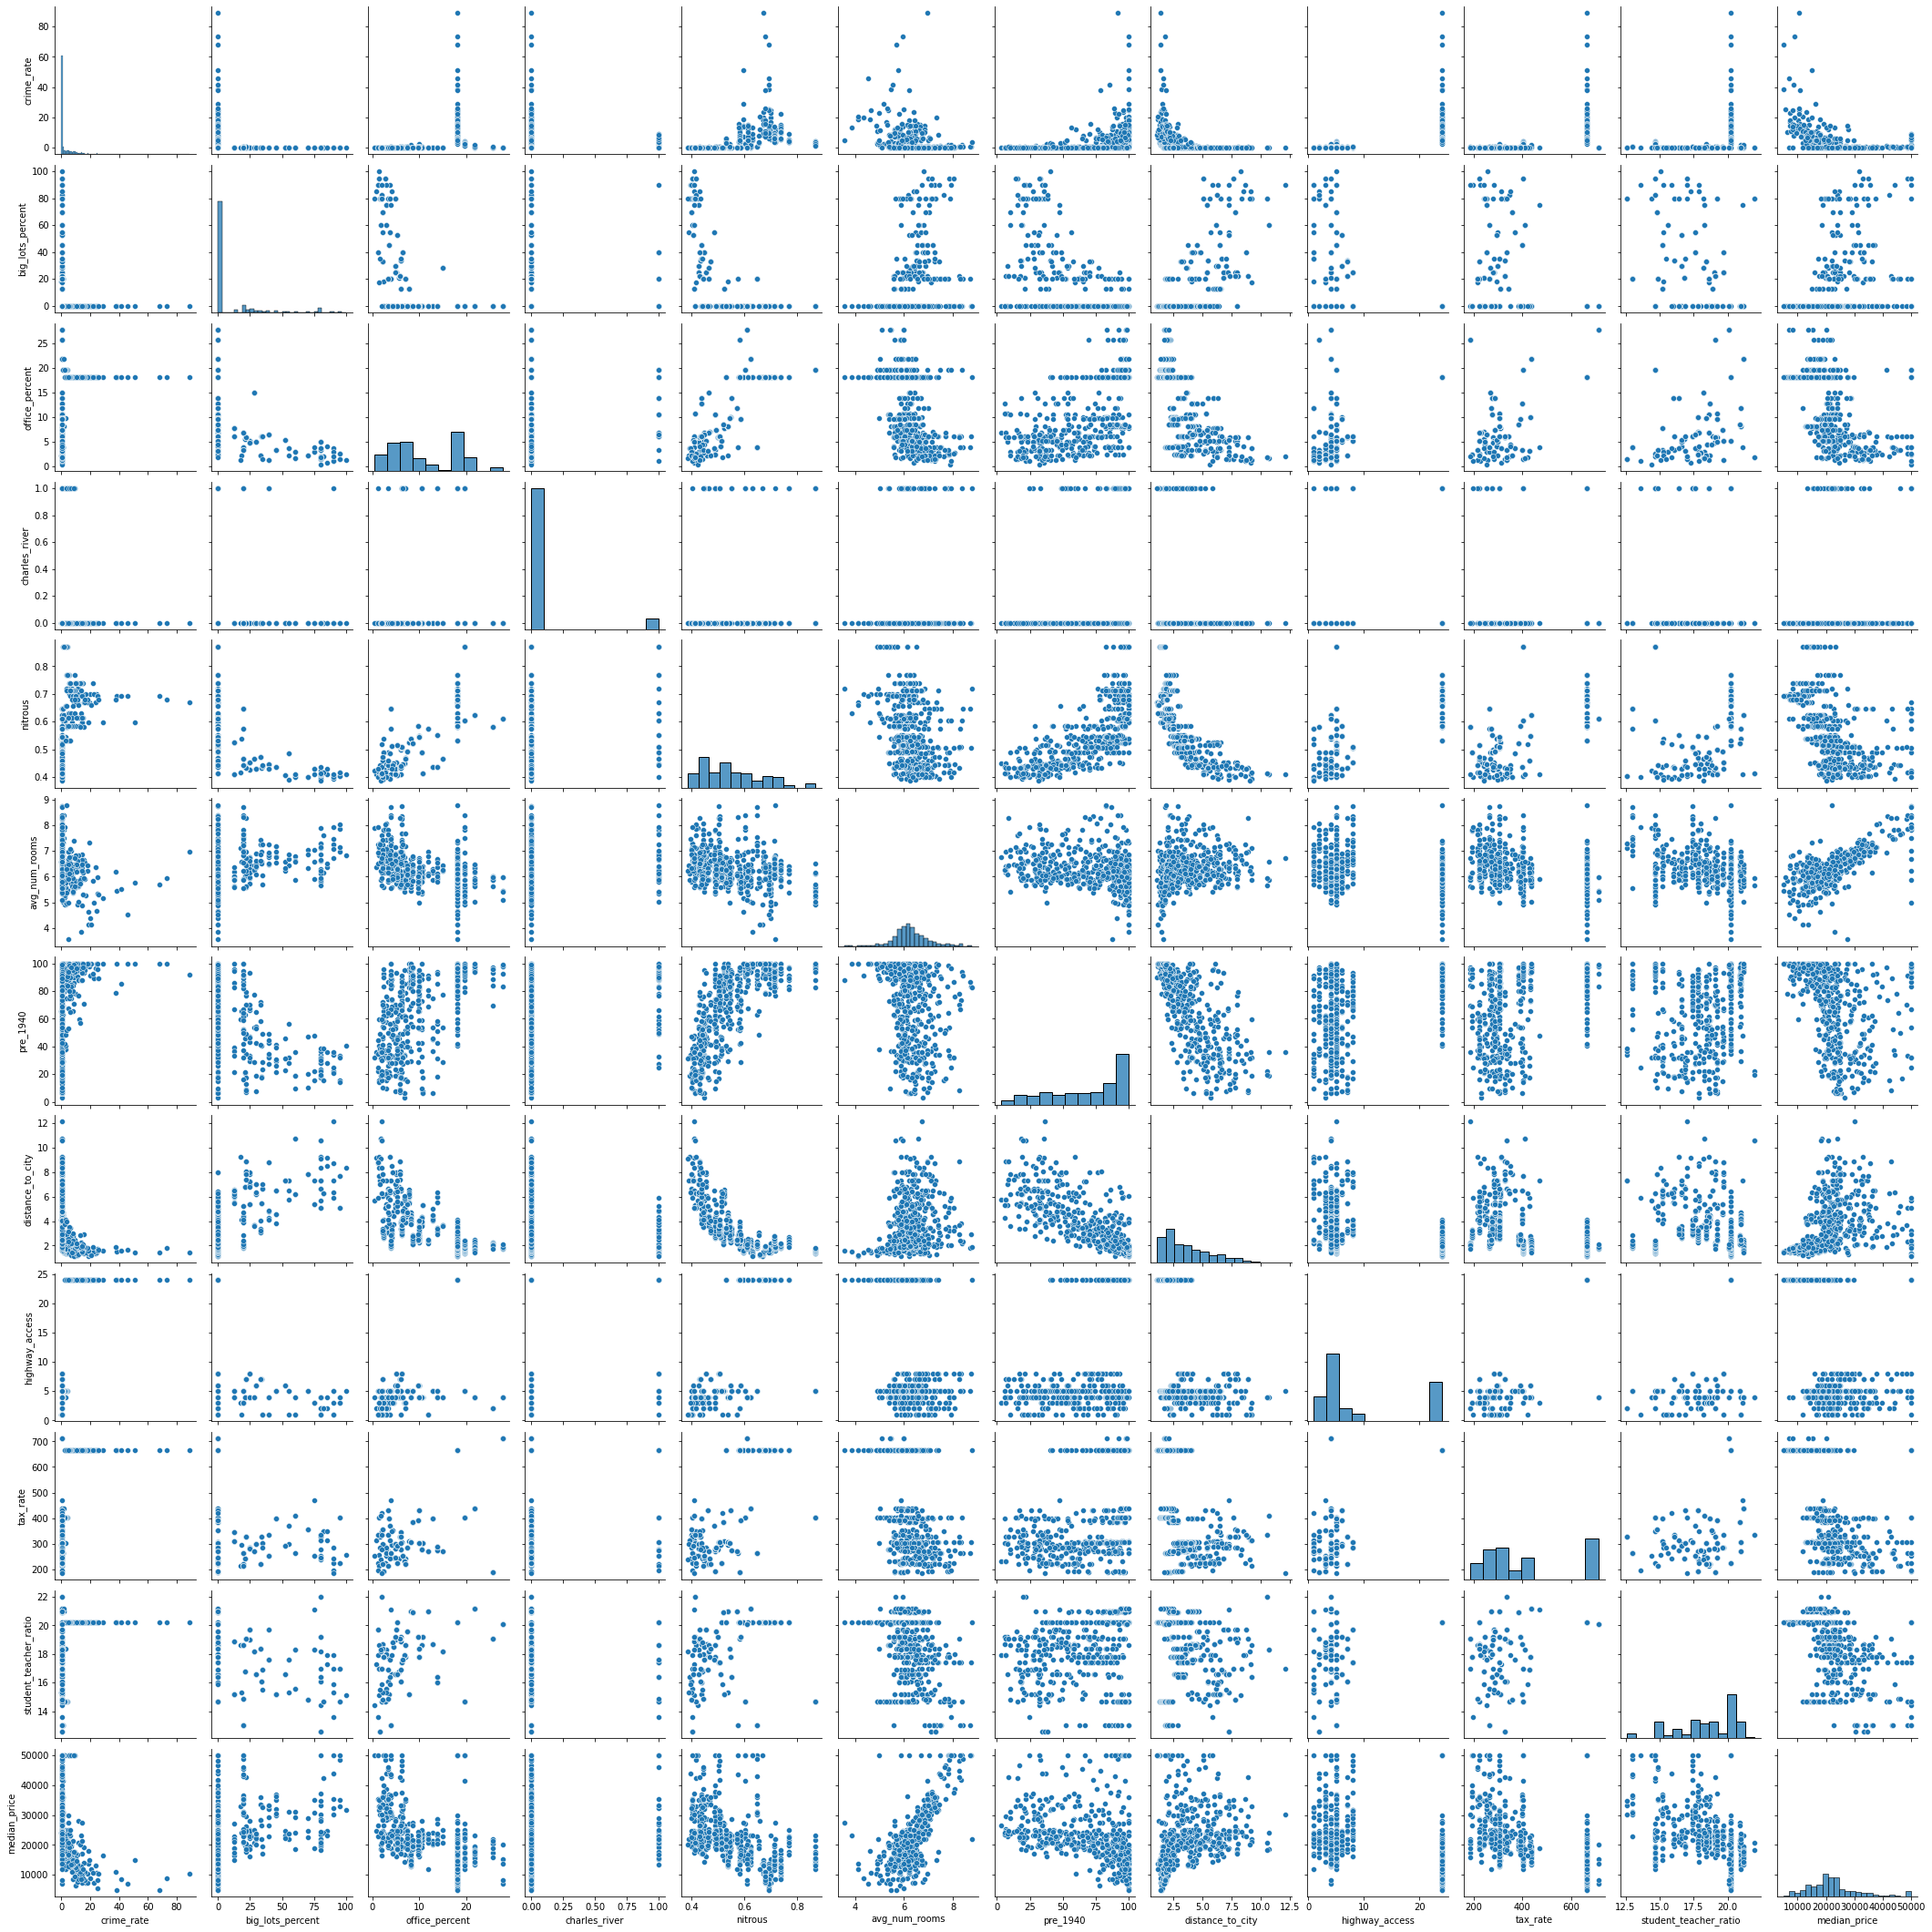

In [ ]:

plt.figure(figsize=(11,14))
sns.pairplot(df)

## Outliers

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text major ticklabel objects>)

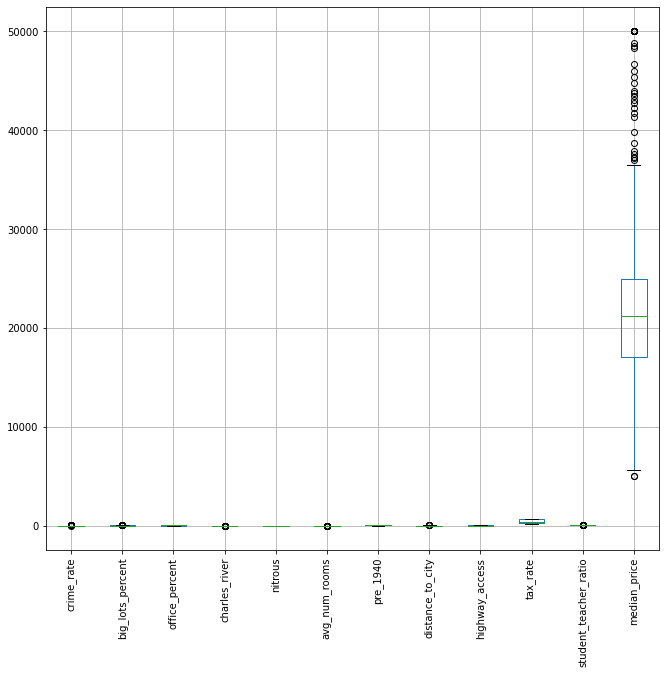

In [ ]:
# crime rate, big lots, avg num rooms, distance to city, student teacher ratio and median price have outliers

plt.figure(figsize=(11,10))
boxplot = df.boxplot()
plt.xticks(rotation = 90)

(array([1, 2, 3, 4, 5]), <a list of 5 Text major ticklabel objects>)

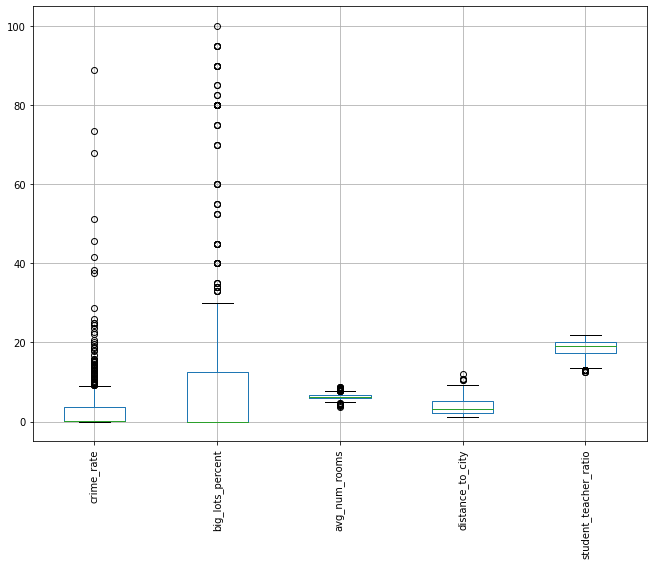

In [ ]:
plt.figure(figsize=(11,8))

boxplot = df.boxplot(['crime_rate', 'big_lots_percent', 'avg_num_rooms', 'distance_to_city', 'student_teacher_ratio'])
plt.xticks(rotation = 90)

addressing outliers - winsorize - median price, crime rate, avg number rooms, big lots, distance to city, student teacher ratio - by creating new columns

In [ ]:
# winsorize to address outliers
from scipy.stats.mstats import winsorize

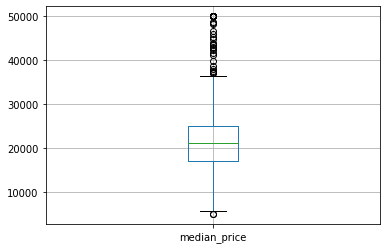

In [ ]:
# median_price

boxplot = df.boxplot(column=['median_price'])


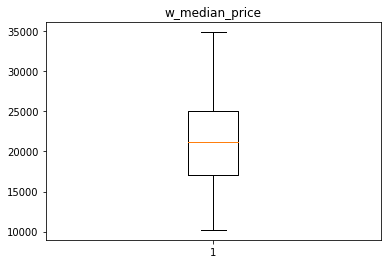

In [ ]:
# winsorize median_price

df['w_median_price'] = winsorize(df['median_price'],(0.05, 0.1))
  
plt.boxplot(df['w_median_price'])
plt.title("w_median_price")
plt.show()

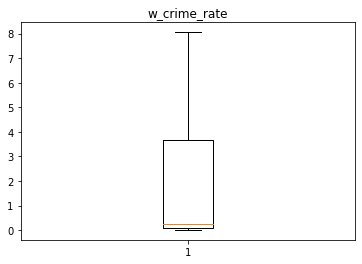

In [ ]:
# winsorize crime_rate

df['w_crime_rate'] = winsorize(df['crime_rate'],(0.0, 0.15))
  
plt.boxplot(df['w_crime_rate'])
plt.title("w_crime_rate")
plt.show()

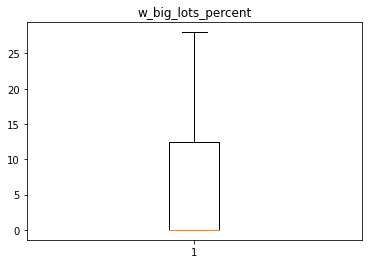

In [ ]:
# winsorize big_lots_percent

df['w_big_lots_percent'] = winsorize(df['big_lots_percent'],(0.0, 0.15))
  
plt.boxplot(df['w_big_lots_percent'])
plt.title("w_big_lots_percent")
plt.show()

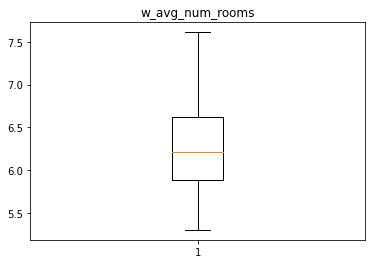

In [ ]:
# winsorize avg_num_rooms

df['w_avg_num_rooms'] = winsorize(df['avg_num_rooms'],(0.05, 0.05))
  
plt.boxplot(df['w_avg_num_rooms'])
plt.title("w_avg_num_rooms")
plt.show()

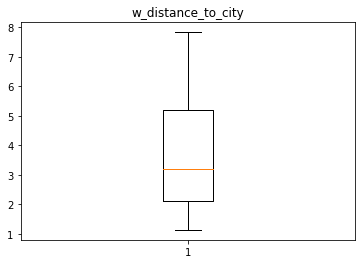

In [ ]:
# winsorize distance_to_city

df['w_distance_to_city'] = winsorize(df['distance_to_city'],(0.0, 0.05))
  
plt.boxplot(df['w_distance_to_city'])
plt.title("w_distance_to_city")
plt.show()

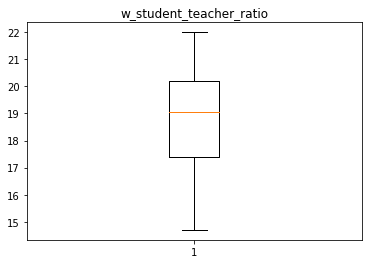

In [ ]:
# winsorize student_teacher_ratio

df['w_student_teacher_ratio'] = winsorize(df['student_teacher_ratio'],(0.05, 0.0))
  
plt.boxplot(df['w_student_teacher_ratio'])
plt.title("w_student_teacher_ratio")
plt.show()

In [ ]:
# columns - inclusing winsorized ones
df.columns

Index(['crime_rate', 'big_lots_percent', 'office_percent', 'charles_river',
       'nitrous', 'avg_num_rooms', 'pre_1940', 'distance_to_city',
       'highway_access', 'tax_rate', 'student_teacher_ratio', 'median_price',
       'w_median_price', 'w_crime_rate', 'w_big_lots_percent',
       'w_avg_num_rooms', 'w_distance_to_city', 'w_student_teacher_ratio'],
      dtype='object')

# Model - Linear Regression

#### OLS to help with feature selection

In [ ]:
# OLS MODEL 1 - FULL MODEL - ALL X - adjusted for outliers
# split into X and y

X1 = df.loc[:, ['office_percent', 'charles_river', 'nitrous', 'pre_1940', 
               'highway_access', 'tax_rate', 'w_crime_rate', 'w_big_lots_percent', 
               'w_avg_num_rooms', 'w_distance_to_city', 'w_student_teacher_ratio']]


y= df['w_median_price']


In [ ]:
# scaling the X1 features

from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after 
# scaling (the df is converted to a numpy array)
cols = X1.columns
X1 = pd.DataFrame(scale(X1))
X1.columns = cols
X1.columns

Index(['office_percent', 'charles_river', 'nitrous', 'pre_1940',
       'highway_access', 'tax_rate', 'w_crime_rate', 'w_big_lots_percent',
       'w_avg_num_rooms', 'w_distance_to_city', 'w_student_teacher_ratio'],
      dtype='object')

In [ ]:

# split into train and test

from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, train_size=0.7, test_size = 0.3, random_state=100)

In [ ]:
# fit model 1
X1_train = sm.add_constant(X1_train)
est = sm.OLS(y_train, X1_train)
est1 = est.fit()
print(est1.summary())

                            OLS Regression Results                            
Dep. Variable:         w_median_price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     103.7
Date:                Thu, 09 Jun 2022   Prob (F-statistic):          8.13e-102
Time:                        15:35:14   Log-Likelihood:                -3371.8
No. Observations:                 354   AIC:                             6768.
Df Residuals:                     342   BIC:                             6814.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# OLS MODEL 2 - drop office percent and big lots percent since p-value high -  X - adjusted for outliers
# split into X and y

X2 = df.loc[:, ['charles_river', 'nitrous', 'pre_1940', 
               'highway_access', 'tax_rate', 'w_crime_rate', 
               'w_avg_num_rooms', 'w_distance_to_city', 'w_student_teacher_ratio']]


y= df['w_median_price']

In [ ]:
# scaling the X2 features

from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after 
# scaling (the df is converted to a numpy array)
cols = X2.columns
X2 = pd.DataFrame(scale(X2))
X2.columns = cols
X2.columns

Index(['charles_river', 'nitrous', 'pre_1940', 'highway_access', 'tax_rate',
       'w_crime_rate', 'w_avg_num_rooms', 'w_distance_to_city',
       'w_student_teacher_ratio'],
      dtype='object')

In [ ]:
# split into train and test

from sklearn.model_selection import train_test_split
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, train_size=0.7, test_size = 0.3, random_state=100)

In [ ]:
# fit model 2
X2_train = sm.add_constant(X2_train)
est = sm.OLS(y_train, X2_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         w_median_price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     125.4
Date:                Thu, 09 Jun 2022   Prob (F-statistic):          5.61e-103
Time:                        15:35:14   Log-Likelihood:                -3374.1
No. Observations:                 354   AIC:                             6768.
Df Residuals:                     344   BIC:                             6807.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### fit linear regression model

select model 2 - using 9 of 11 X variables.  the two models are not significantly different - AIC the same.   Standard errors generally smaller for model 2. Model 1 slightly better in terms of adjusted r-squared, durbin-watson, skewness. 

In [ ]:
X = df.loc[:, ['charles_river', 'nitrous', 'pre_1940', 
               'highway_access', 'tax_rate', 'w_crime_rate', 
               'w_avg_num_rooms', 'w_distance_to_city', 'w_student_teacher_ratio']]


y= df['w_median_price']

In [ ]:
# scaling the X features

from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['charles_river', 'nitrous', 'pre_1940', 'highway_access', 'tax_rate',
       'w_crime_rate', 'w_avg_num_rooms', 'w_distance_to_city',
       'w_student_teacher_ratio'],
      dtype='object')

In [ ]:
# split into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [ ]:
# regression model

model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# print coefficients and intercept
print(model.coef_)
print(model.intercept_)

[  466.64751146 -1451.93633352 -1555.96897364  3863.93768173
 -1776.9344374  -3866.60228806  3293.67195107 -2252.72297362
 -1657.81877487]
21759.810004650233


In [ ]:
# predict 
y_pred = model.predict(X_test)


In [ ]:
# predictive  accuracy

from sklearn import metrics


In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

15714571.452130998

In [ ]:
rmse = np.sqrt(mse)
rmse

3964.1608761667326

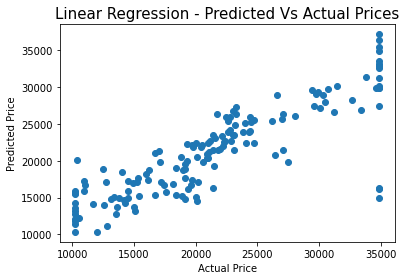

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression - Predicted Vs Actual Prices", fontsize=15)
plt.show()

# Model -  Random Forest

help for RF, SVM from - https://www.kaggle.com/code/preetishasrivastava/boston-house-price-eda-and-prediction/notebook


In [ ]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestRegressor

In [ ]:
# import library

rforest = RandomForestRegressor()

In [ ]:
# fit model

rforest.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
# prediction

y_pred=rforest.predict(X_test)

In [ ]:
# predictive  accuracy

from sklearn import metrics

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

13168560.236842105

In [ ]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE:  3628.85109047507


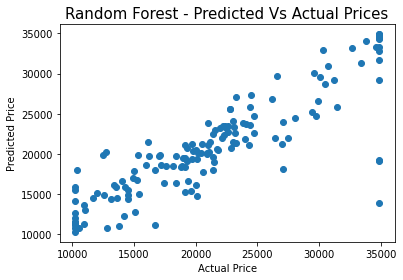

In [ ]:
# visualizing the difference between the actual and predicted price 

plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest - Predicted Vs Actual Prices", fontsize=15)
plt.show()

# Model -  Ridge Regression 
data has some multicollinearity among the X variables (correlation high among some X variables) - try Ridge Regression.

help and code from: https://www.statology.org/ridge-regression-in-python/


In [ ]:
# RIDGE REGRESSION

from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold


In [ ]:
# define X and y
X = df.loc[:, ['charles_river', 'nitrous', 'pre_1940', 
               'highway_access', 'tax_rate', 'w_crime_rate', 
               'w_avg_num_rooms', 'w_distance_to_city', 'w_student_teacher_ratio']]


y= df['w_median_price']

In [ ]:
# scaling the X features

from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['charles_river', 'nitrous', 'pre_1940', 'highway_access', 'tax_rate',
       'w_crime_rate', 'w_avg_num_rooms', 'w_distance_to_city',
       'w_student_teacher_ratio'],
      dtype='object')

In [ ]:
# split into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [ ]:
# define cross-validation method to evaluate the model

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=100)


In [ ]:
# define the model

model = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')


In [ ]:
# fit model

model.fit(X_train, y_train)


RidgeCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=100),
        scoring='neg_mean_absolute_error')

In [ ]:
# display lambda that produced the lowest test MSE
print(model.alpha_)


0.99


In [ ]:
# prediction
model.predict(X_test)

array([29927.4687836 , 30051.16528661, 19945.10276185, 15998.14214545,
       18797.25082801, 22626.67036191, 25904.18290481, 24063.57462666,
       21845.9502498 , 15481.13159878, 24773.58106051, 13178.80686988,
       20463.02602543, 15378.37039066, 36341.48634216, 22517.63922801,
       25982.03920812, 17433.29571315, 29065.062148  , 32661.41410305,
       31284.21904129, 20165.96938242, 21791.80897784, 14691.73029003,
       12261.84183764, 17066.53154209, 25325.33025361, 20923.98896832,
       14543.1696623 , 19988.12019044, 15471.96480057, 23793.14108347,
       33083.37636803, 23970.68684313, 29736.79387587, 26988.70451783,
       13790.60598868, 15953.4169319 , 18807.76998746, 22426.4607396 ,
       22683.17592243, 22803.55752339, 18590.98769804, 22346.44444976,
       25747.39557663, 26417.70511446, 17570.47397893, 15263.20886392,
       14864.43512999, 12899.16888878, 20998.2190768 , 20052.30887546,
       22143.99963595, 25366.51801114, 10385.46160681, 17335.73798156,
      

In [ ]:
# predictive  accuracy

from sklearn import metrics

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

13168560.236842105

In [ ]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE:  3628.85109047507


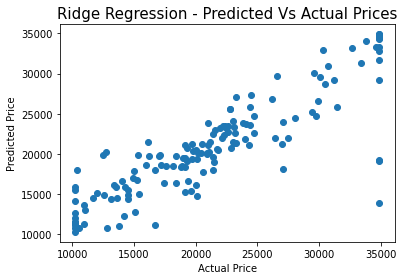

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Ridge Regression - Predicted Vs Actual Prices", fontsize=15)
plt.show()

# Model - SVR

In [ ]:
# scaling the X features

from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['charles_river', 'nitrous', 'pre_1940', 'highway_access', 'tax_rate',
       'w_crime_rate', 'w_avg_num_rooms', 'w_distance_to_city',
       'w_student_teacher_ratio'],
      dtype='object')

In [ ]:
# split into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [ ]:
# import library
from sklearn.svm import SVR

In [ ]:
# define and fit the model

svm_reg=svm.SVR(kernel='linear')

In [ ]:
svm_reg.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
# prediction

y_pred=svm_reg.predict(X_test)

In [ ]:
# predictive  accuracy

from sklearn import metrics

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

46691025.83047678

In [ ]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE:  6833.083186269342


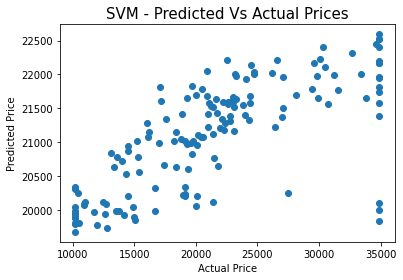

In [ ]:
# visualizing the difference between the actual and predicted price 

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("SVM - Predicted Vs Actual Prices", fontsize=15)
plt.show()

In [ ]:
# finetune the model
# define and fit the model

svm_reg=svm.SVR(kernel='rbf', epsilon=1.0)


In [ ]:
svm_reg.fit(X_train, y_train)

SVR(epsilon=1.0)

In [ ]:
# prediction

y_pred=svm_reg.predict(X_test)

In [ ]:
# predictive  accuracy

from sklearn import metrics

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

54121032.544333234

In [ ]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE:  7356.699840576156


kernel = linear give lower rme for SVR model

# using rmse to evaluate models

rmse linear regression = 3964.1

rmse random forest = 3646.9

rmse ridge regression = 3646.9

rmse SVR (kernel=linear) = 6833.08

Random Forest and Ridge Regression yield the lowest RMSE - select these for use